# Supervised Machine Learning

#### **Using the Breast Cancer dataset, the following machine learning algorithms for binary classification are used:**
• Logistic Regression<br> 
• Random Forest<br> 
• Suport Vector Machine 

### Load the Dataset

In [233]:
df = load_breast_cancer()
bc = pd.DataFrame(df.data,columns=df.feature_names)
bc['target'] = pd.Series(df.target)

bc.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


### Visualize the data

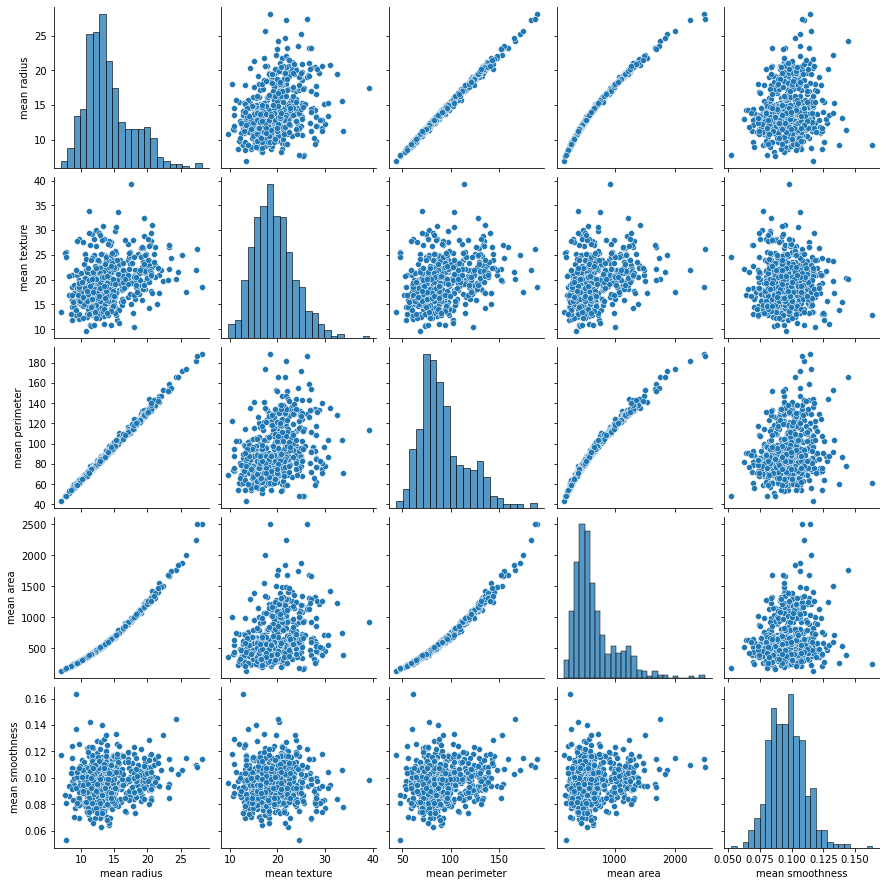

In [234]:
# I'll plot out just the first 5 variables (features)
sns.pairplot(bc, vars = ['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness'] )

The graphs above depict the relationship between our features. The only issue is that they don't indicate which of the "dots" is malignant and which is benign.

This problem will be solved in the next sections by using the "target" variable as the "hue" for the plots.

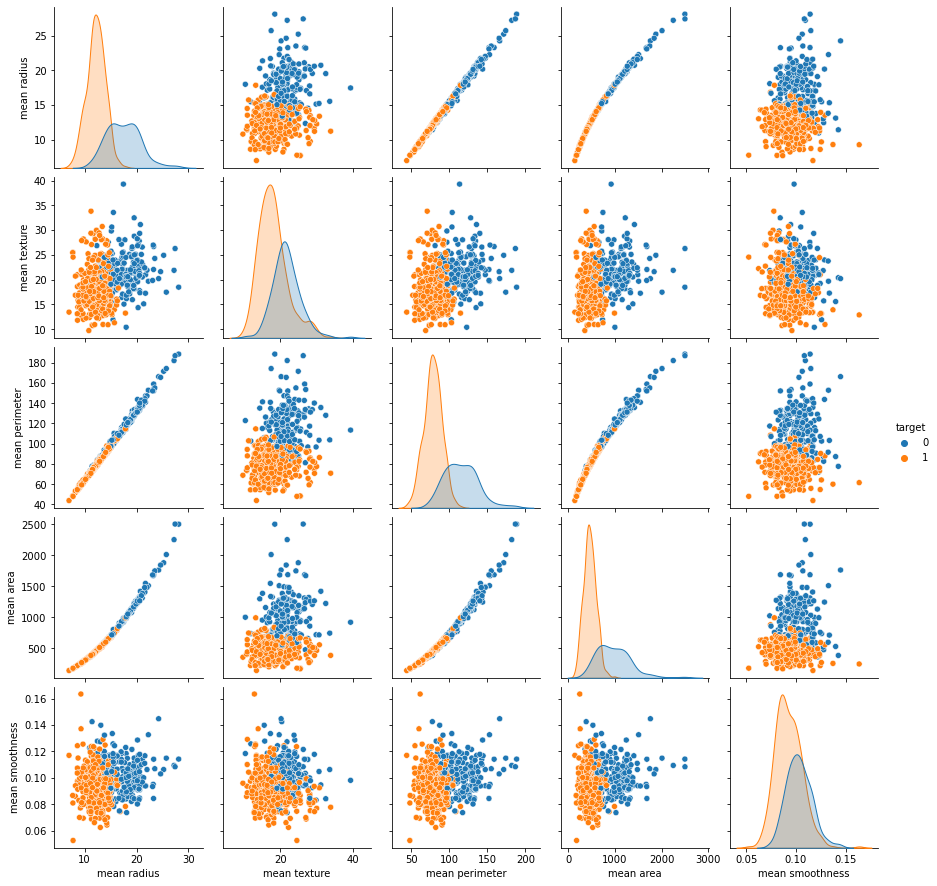

In [235]:
# Let's plot out just the first 5 variables (features)
sns.pairplot(bc, hue = 'target', vars = ['mean radius', 'mean texture', 'mean perimeter','mean area','mean smoothness'] )

**Note:** 
    
  1.0 (Orange) = Benign (No Cancer)
  
  0.0 (Blue) = Malignant (Cancer)

### How many Benign and Malignant are present in the dataset?

In [236]:
bc['target'].value_counts()

1    357
0    212
Name: target, dtype: int64

As shown, there are:
212 - Malignant, and 357 - Benign

Visualize the counts

C:\DeveloperTools\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='target', ylabel='count'>

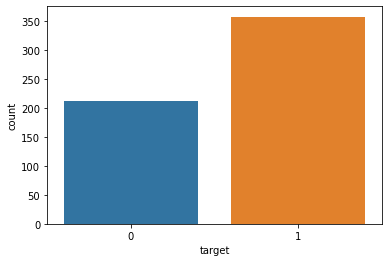

In [237]:
sns.countplot(bc['target'], label = "Count") 

### Check the correlation between features 

There is a strong correlation between the mean radius and mean perimeter, mean area and mean primeter

<AxesSubplot:>

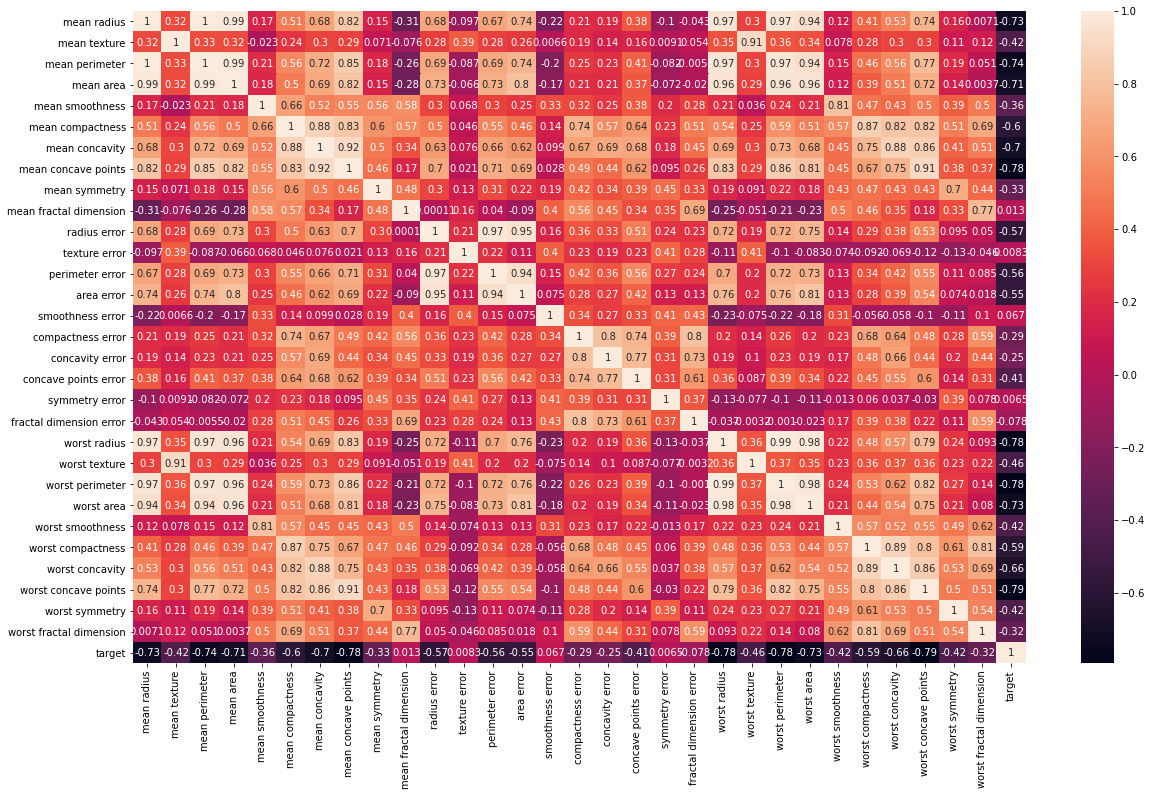

In [238]:
plt.figure(figsize=(20,12)) 
sns.heatmap(bc.corr(), annot=True) 

## 1.  START OF LOGISTIC REGRESSION

### Import pandas - Python Data Analysis Library

In [239]:
import pandas as pd

### Load the Dataset
The UCI ML Breast Cancer Wisconsin (Diagnostic)​ dataset is one of datasets scikit-learn comes with that do not require the downloading of any file from some external website. The code below loads the breast cancer dataset.

In [240]:
from sklearn.datasets import load_breast_cancer
df = load_breast_cancer()
bc = pd.DataFrame(df.data,columns=df.feature_names)
bc['target'] = pd.Series(df.target)

In [241]:
bc.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


### **Preventing Overfitting and Splitting Data into Training and Test Sets** 

**Regularization:** Introducing a penalty for overly complex features that reduces - or eliminates - their weight in our model.


**L1 regularization in a Logistic Regression model.**

Train/Test Split

In [242]:
from sklearn.model_selection import train_test_split

X, y = bc.iloc[:, :-1].values, bc.iloc[:, -1].values

X_train, X_test, y_train, y_test =\
    train_test_split(X, y, 
                     test_size=0.3, 
                     random_state=0, 
                     stratify=y)

### Standardize the Data (Scale features)
Logistic Regression is effected by scale so you need to scale the features in the data before using Logistic Regresison. You can transform the data onto unit scale (mean = 0 and variance = 1) for better performance. Scikit-Learn's `StandardScaler` helps standardize the dataset’s features.

In [243]:
from sklearn.preprocessing import StandardScaler

stdsc = StandardScaler()
# Apply transform to both the training set and the test set.
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

### Logistic Regression Model

In [244]:
from sklearn.linear_model import LogisticRegression

# Make a linear regression instance
lr = LogisticRegression(penalty='l1', C=0.2, solver='liblinear', multi_class='ovr')
# Train the model on the training set.
lr.fit(X_train_std, y_train)

print('Training accuracy:', round(lr.score(X_train_std, y_train),3))
print('Test accuracy:', round(lr.score(X_test_std, y_test),3))

Training accuracy: 0.99
Test accuracy: 0.947


In [245]:
# One observation's breast cancer after standardization
X_test_std[0].reshape(1,-1)

array([[ 0.82242363,  1.85909083,  0.77729613,  0.76001047,  0.21076396,
         0.12912155,  0.15366833,  0.38824055, -0.02979077,  0.01003252,
         1.83610455, -0.10869095,  1.50906355,  1.54455559,  0.51948232,
        -0.18876276, -0.16835906,  0.44308559, -0.02105518,  0.29182887,
         1.37722326,  1.47438245,  1.32620149,  1.33685328,  1.23237337,
        -0.06407922, -0.03398234,  0.61566933,  0.19163397,  0.3764545 ]])

In [246]:
print('prediction', lr.predict(X_test_std[0].reshape(1,-1))[0])
print('probability', lr.predict_proba(X_test_std[0].reshape(1,-1)))

prediction 0
probability [[0.99804745 0.00195255]]


## END OF START OF LOGISTIC REGRESSION

## 2. START OF RANDOM FORESTS 

In [247]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

# Regression Models
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import BaggingRegressor

# Classifer Models
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier

# To visualize individual decision trees
from sklearn import tree
from sklearn.tree import export_text

### Load the Dataset

In [248]:
# This was already imported earlier in the notebook so commenting out
#from sklearn.datasets import load_breast_cancer

df = load_breast_cancer()
bc = pd.DataFrame(df.data,columns=df.feature_names)
bc['target'] = pd.Series(df.target)

bc.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [249]:
# This notebook only selects a couple features for simplicity
# However, I encourage you to play with adding and substracting features
features = ['mean texture','mean perimeter','mean area','mean smoothness','mean compactness']

X = bc.loc[:, features]

y = bc.loc[:, 'mean radius'].values

### Splitting Data into Training and Test Sets

In [250]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

Note, another benefit of bagged trees like decision trees is that you don’t have to standardize your features unlike other algorithms like Logistic Regression and K-Nearest Neighbors. 

<b>Step 1:</b> Import the model

In [251]:
# This was already imported earlier in the notebook so commenting out
#from sklearn.ensemble import RandomForestRegressor

<b>Step 2:</b> Make a random forest instance

In [252]:
reg = RandomForestRegressor(n_estimators=100, random_state = 0)

<b>Step 3:</b> Training the model on the data, storing the information learned from the data

Model is learning the relationship between X (features like mean radius) and y (mean texture)

In [253]:
# Train the model on the training set.
reg.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

<b>Step 4:</b> Predict the labels of new data (new breast cancer diagnosis)

Uses the information the model learned during the model training process

In [254]:
# Returns a NumPy Array
# Predict for One Observation
reg.predict(X_test.iloc[0].values.reshape(1, -1))

array([13.4894])

Predict for Multiple Observations at Once

In [255]:
reg.predict(X_test[0:10])

array([13.4894 , 13.1791 , 13.9974 , 14.2281 , 13.0275 , 11.2997 ,
       12.0822 , 11.6545 ,  7.72545, 10.2732 ])

### Measuring Model Performance

In [256]:
score = reg.score(X_test, y_test)
print(score)

0.9988582009601563


### Visualizing Individual Decision Trees from a Bagged Tree and Random Forest Model
The purpose of this section is to show you that both ensemble models are really comprised of many decision trees.

In [257]:
# Load the Breast Cancer Dataset
data = load_breast_cancer()
bc = pd.DataFrame(df.data,columns=data.feature_names)
bc['target'] = data.target

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(bc[data.feature_names], bc['target'], random_state=0)

In [258]:
# Fit Bagged Tree Model
btc = BaggingClassifier(n_estimators=100, 
                        random_state = 1)

btc.fit(X_train, y_train)

# Fit Random Forest Model
rfc = RandomForestClassifier(n_estimators=100, random_state = 1)

rfc.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

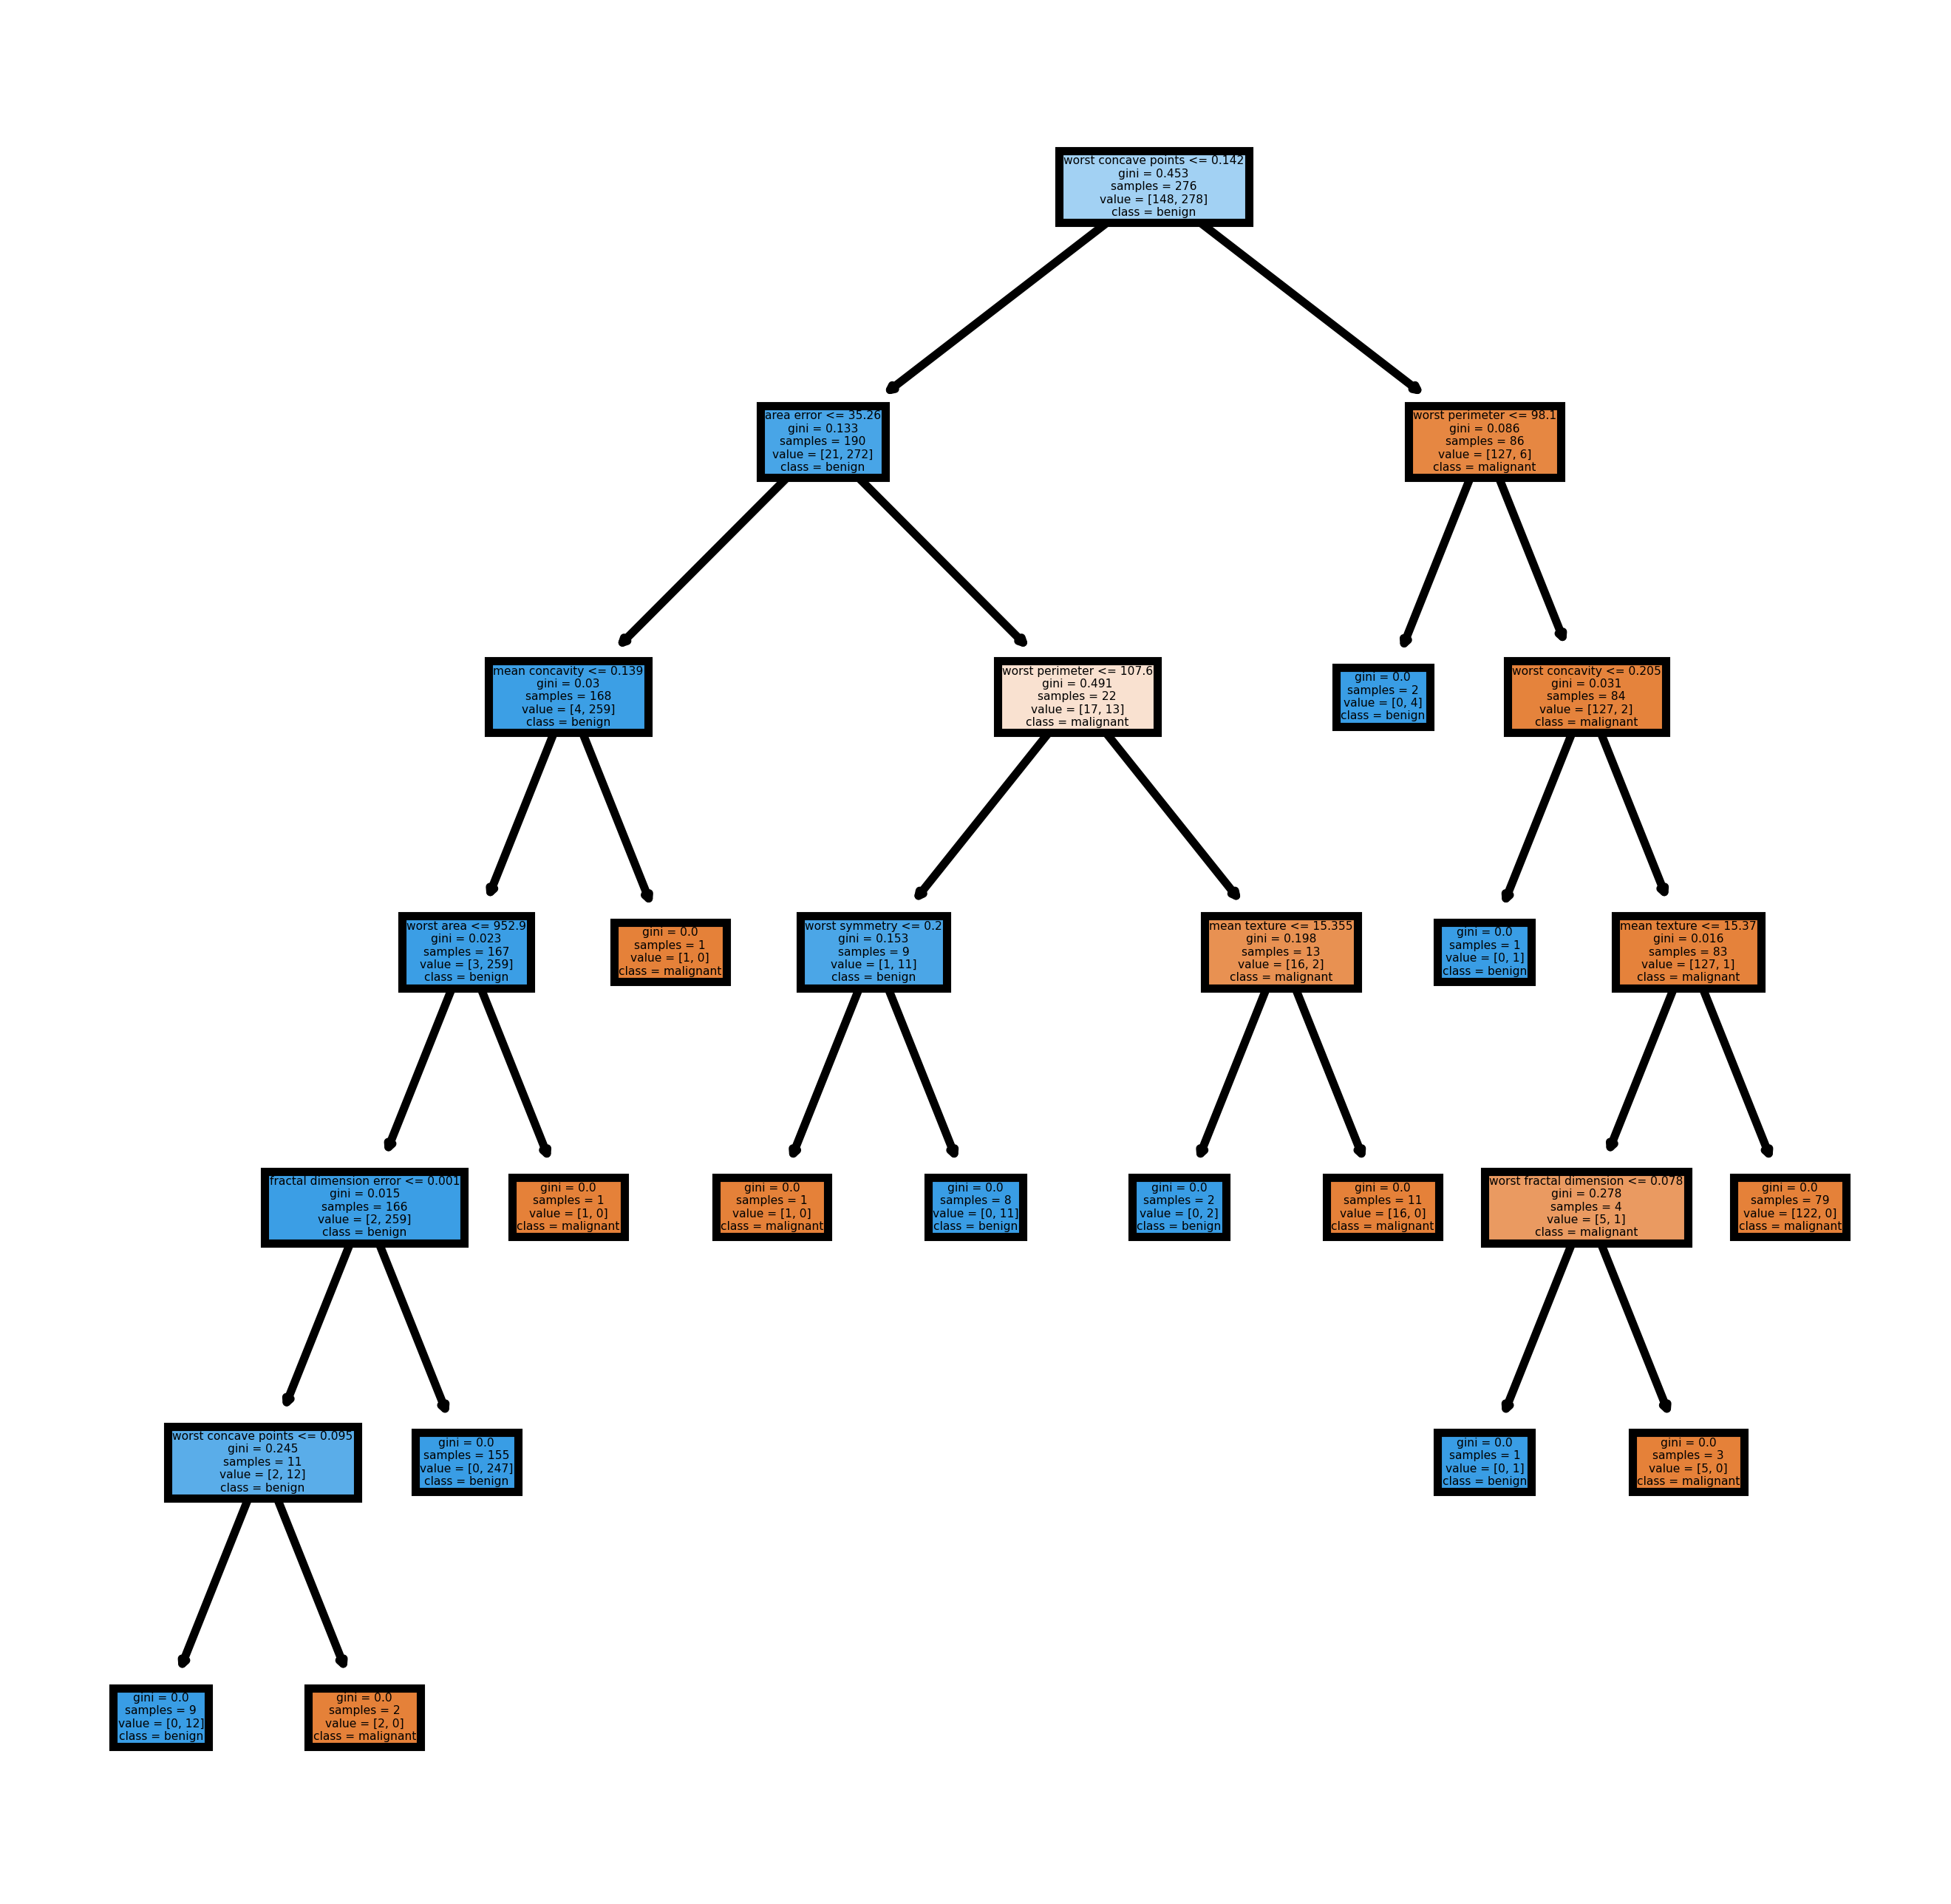

In [259]:
# Get the first decision tree for bagged tree model
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=800)
tree.plot_tree(btc.estimators_[0],
               feature_names = data.feature_names, 
               class_names=data.target_names,
               filled = True);

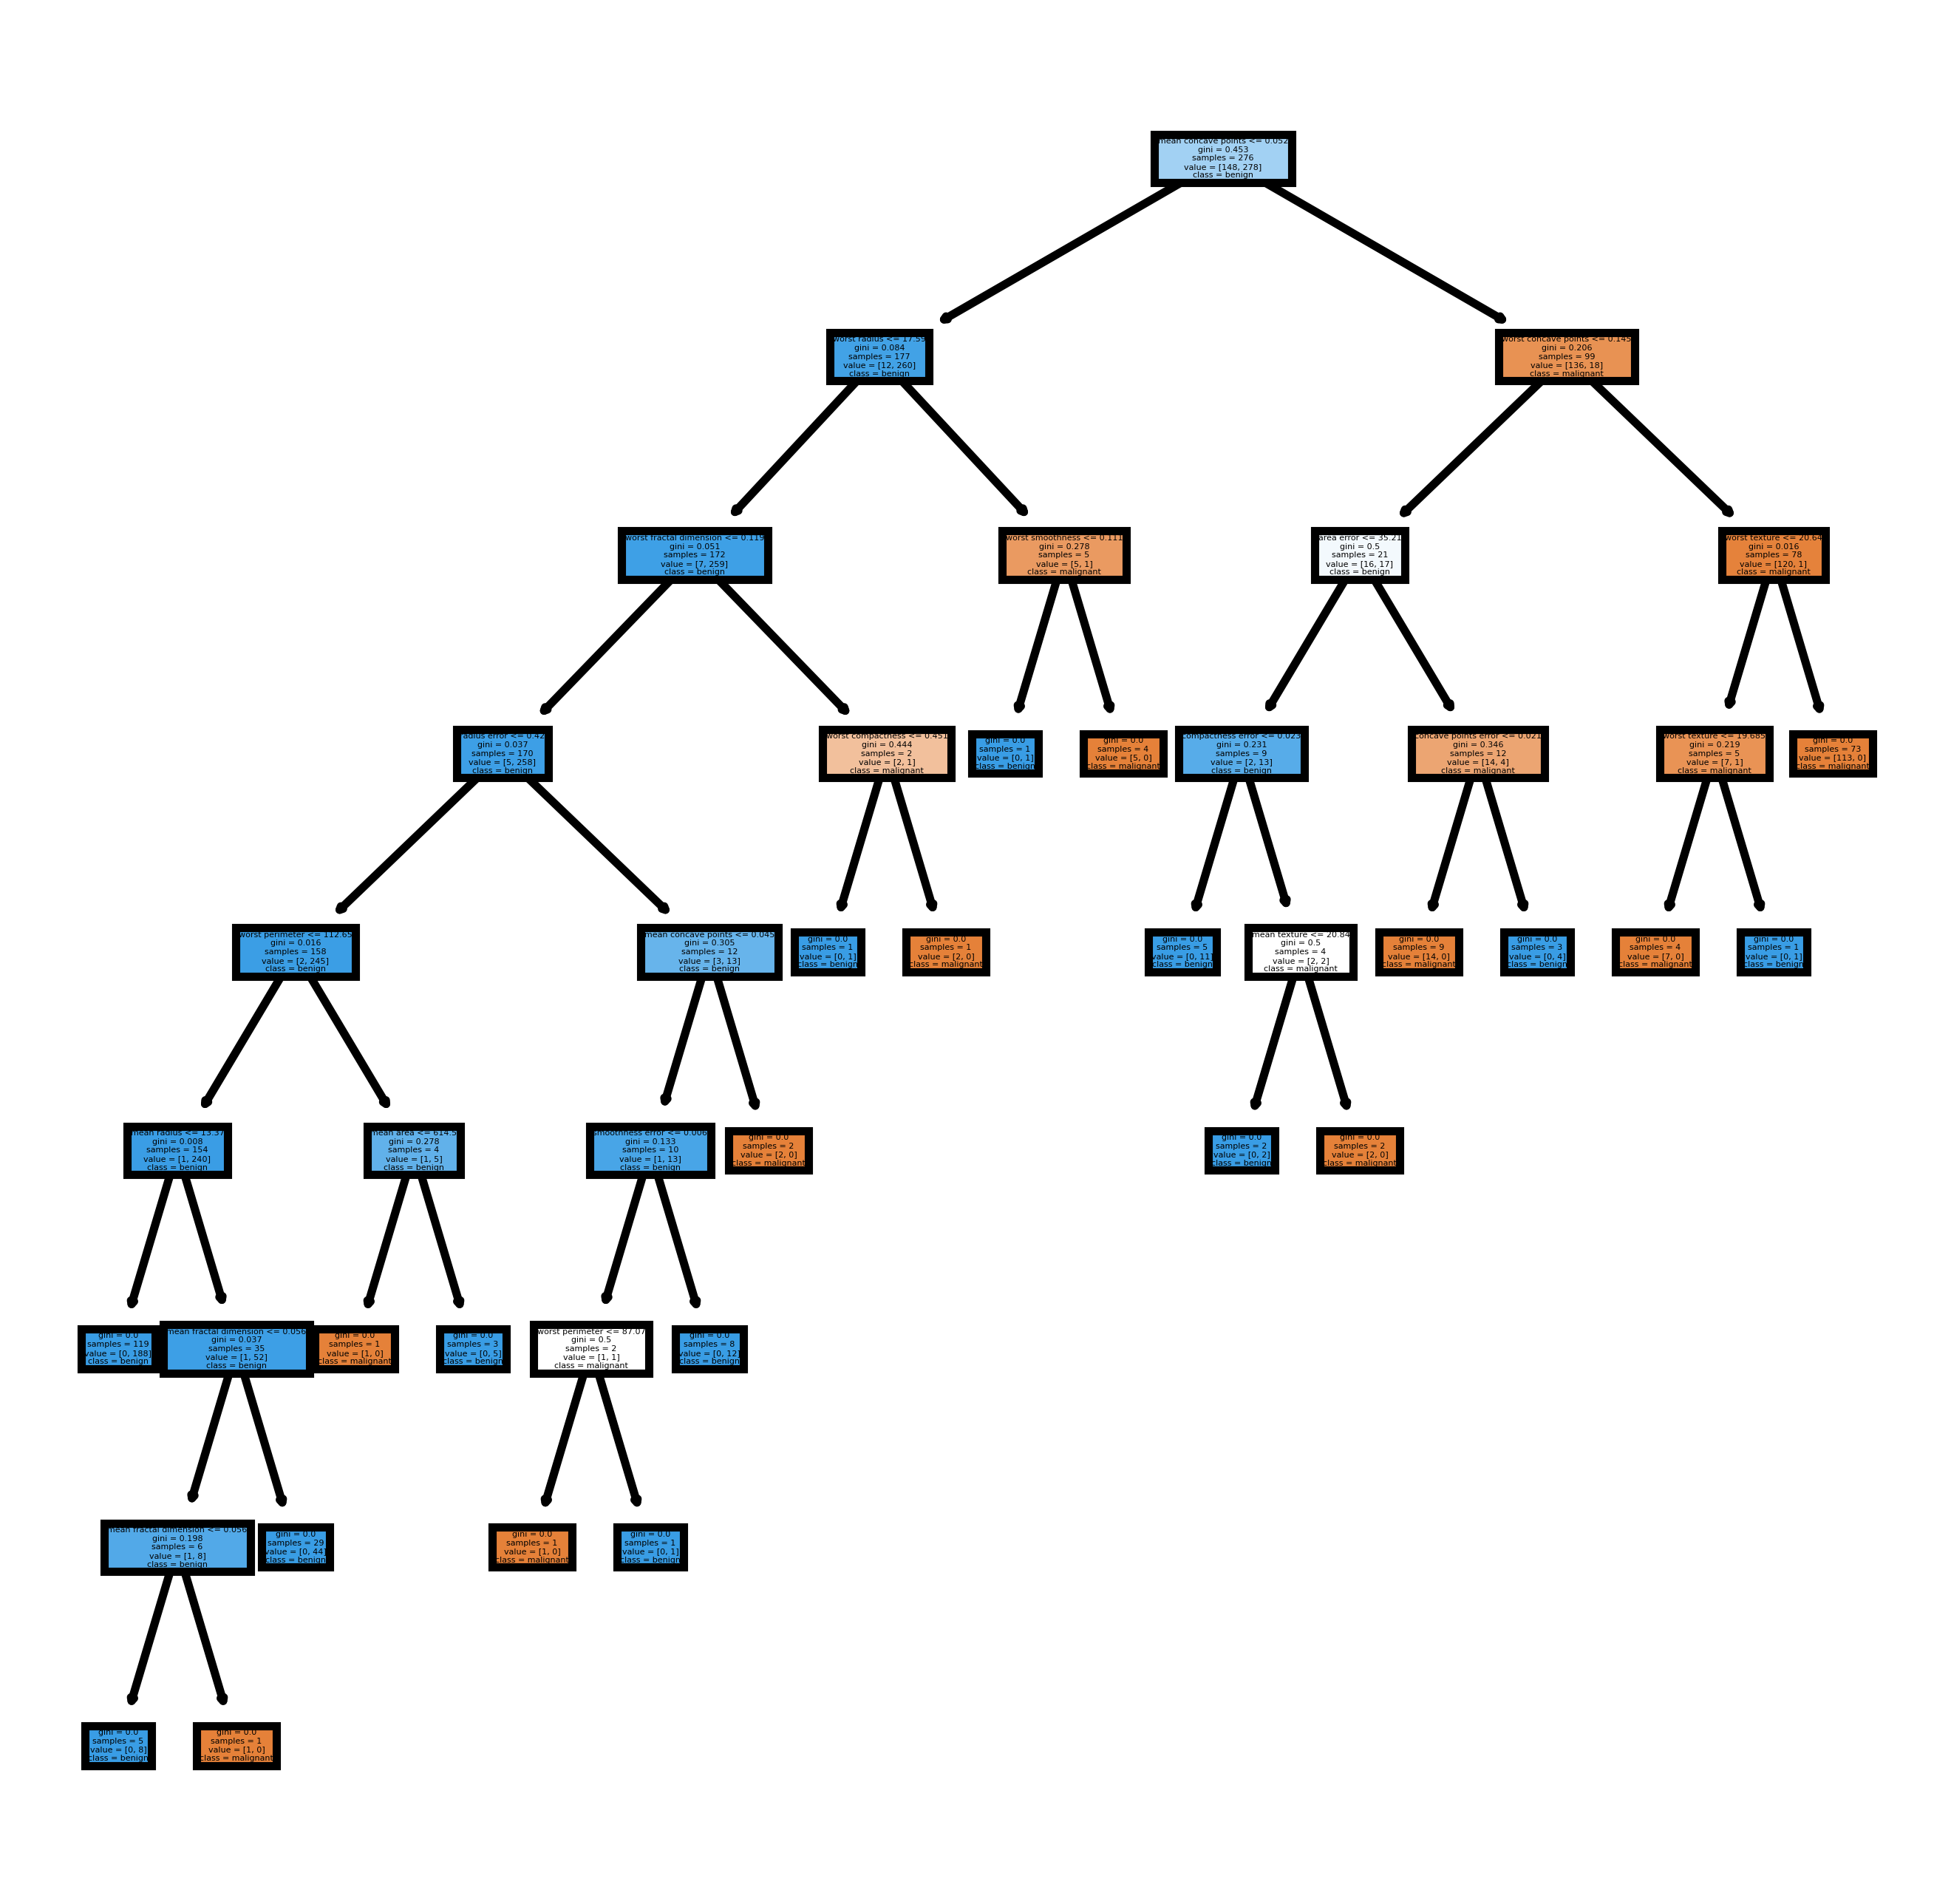

In [260]:
# Get the first decision tree for a random forest model
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=800)
tree.plot_tree(rfc.estimators_[0],
               feature_names = data.feature_names, 
               class_names=data.target_names,
               filled = True);

### Feature Importance
Random Forests give feature importance metrics. Like any metric, it isn't perfect. 

In [261]:
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(rfc.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False)

In [262]:
importances

,feature,importance
22,worst perimeter,0.124
27,worst concave points,0.121
7,mean concave points,0.118
23,worst area,0.098
20,worst radius,0.090
6,mean concavity,0.076
2,mean perimeter,0.058
0,mean radius,0.057
3,mean area,0.038
13,area error,0.028


## END OF RANDOM FORESTS 

## 3. START OF Support Vector Machine (SVM)

### Load the Dataset

In [263]:
# This was already imported earlier in the notebook so commenting out
#from sklearn.datasets import load_breast_cancer

df = load_breast_cancer()
bc = pd.DataFrame(df.data,columns=df.feature_names)
bc['target'] = pd.Series(df.target)

bc.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


### Model Training

**From the dataset, create the target and predictor matrix**

- "y" = is the feature we are trying to predict (Output). In this case we are trying to predict wheither our "target" is Cancer (Malignant) or not (Benign). I.e. we are going to use the "target" feature here.
- "X" = The predictors which are the remaining columns (mean radius, mean texture, mean perimeter, mean area, mean smoothness, etc)

In [264]:
X = bc.drop(['target'], axis = 1) # Drop the "target" feature and use all the remaining features in the dataframe to train the model.
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [265]:
y = bc['target']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int32

### Splitting Data into Training and Test Sets

This time, I will split the data using 80% for training and the remaining 20% for testing.

In [266]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 20)

### Support Vector Machine (SVM) Model 

In [267]:
from sklearn.svm import SVC

In [268]:
# Make SVC instance
svc_model = SVC()

In [269]:
# Train SVM model with the "training" dataset.
svc_model.fit(X_train, y_train)

SVC()

In [270]:
y_predict = svc_model.predict(X_test)

**Now check the accuracy of the prediction by comparing it to the output already have (y_test). Use confusion matrix for this comparison**

### The confusion matrix -  a table representing the performance of your model to classify labels correctly.

In [271]:
# Import metric libraries

from sklearn.metrics import classification_report, confusion_matrix

### Normalalize Training Data First
Normalization is a data preparation technique that is frequently used in machine learning. Normalization is the process of converting the values of numeric columns in a dataset to a similar scale without distorting the ranges of values. Every dataset does not need to be normalized for machine learning. It is only required when the ranges of features are different.

In [282]:
X_train_min = X_train.min()
X_train_min

mean radius                  6.981000
mean texture                10.380000
mean perimeter              43.790000
mean area                  143.500000
mean smoothness              0.052630
mean compactness             0.019380
mean concavity               0.000000
mean concave points          0.000000
mean symmetry                0.106000
mean fractal dimension       0.049960
radius error                 0.111500
texture error                0.360200
perimeter error              0.757000
area error                   6.802000
smoothness error             0.001713
compactness error            0.002252
concavity error              0.000000
concave points error         0.000000
symmetry error               0.007882
fractal dimension error      0.000895
worst radius                 7.930000
worst texture               12.490000
worst perimeter             50.410000
worst area                 185.200000
worst smoothness             0.071170
worst compactness            0.027290
worst concav

In [283]:
X_train_max = X_train.max()
X_train_max

mean radius                  28.11000
mean texture                 39.28000
mean perimeter              188.50000
mean area                  2501.00000
mean smoothness               0.14470
mean compactness              0.34540
mean concavity                0.42680
mean concave points           0.20120
mean symmetry                 0.30400
mean fractal dimension        0.09296
radius error                  2.87300
texture error                 4.88500
perimeter error              21.98000
area error                  542.20000
smoothness error              0.03113
compactness error             0.13540
concavity error               0.39600
concave points error          0.05279
symmetry error                0.07895
fractal dimension error       0.02984
worst radius                 36.04000
worst texture                49.54000
worst perimeter             251.20000
worst area                 4254.00000
worst smoothness              0.22260
worst compactness             1.05800
worst concav

In [284]:
X_train_range = (X_train_max- X_train_min)
X_train_range

mean radius                  21.129000
mean texture                 28.900000
mean perimeter              144.710000
mean area                  2357.500000
mean smoothness               0.092070
mean compactness              0.326020
mean concavity                0.426800
mean concave points           0.201200
mean symmetry                 0.198000
mean fractal dimension        0.043000
radius error                  2.761500
texture error                 4.524800
perimeter error              21.223000
area error                  535.398000
smoothness error              0.029417
compactness error             0.133148
concavity error               0.396000
concave points error          0.052790
symmetry error                0.071068
fractal dimension error       0.028945
worst radius                 28.110000
worst texture                37.050000
worst perimeter             200.790000
worst area                 4068.800000
worst smoothness              0.151430
worst compactness        

In [285]:
X_train_scaled = (X_train - X_train_min)/(X_train_range)
X_train_scaled.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
412,0.114345,0.391003,0.110290,0.053150,0.293907,0.126219,0.087512,0.025487,0.108081,0.401860,...,0.072394,0.418354,0.080681,0.028460,0.247177,0.156601,0.149201,0.088110,0.192682,0.242818
461,0.967343,0.549827,0.988943,1.000000,0.605735,0.550334,0.851687,0.839463,0.505556,0.145814,...,1.000000,0.509582,1.000000,1.000000,0.426137,0.386442,0.545767,0.902062,0.255643,0.126131
532,0.317052,0.205882,0.303849,0.183245,0.435973,0.163088,0.041050,0.093439,0.288384,0.269535,...,0.281750,0.208097,0.254943,0.144564,0.364723,0.125263,0.096326,0.299107,0.294844,0.149416
495,0.373373,0.340138,0.361620,0.227953,0.469643,0.196522,0.159888,0.246074,0.215657,0.174884,...,0.287442,0.431579,0.266398,0.147070,0.333025,0.108188,0.135783,0.349485,0.191019,0.071822
13,0.419755,0.469550,0.414000,0.271135,0.340828,0.247899,0.232849,0.266600,0.397475,0.079535,...,0.316969,0.409447,0.306738,0.169903,0.276894,0.160191,0.185463,0.384536,0.295557,0.051358


### Now Normalized

In [286]:
X_test_min = X_test.min()
X_test_range = (X_test - X_test_min).max()
X_test_scaled = (X_test - X_test_min)/X_test_range

In [287]:
# Make SVC instance
svc_model = SVC()

# Train SVM model with the "training" dataset.
svc_model.fit(X_train_scaled, y_train)

SVC()

In [288]:
y_predict = svc_model.predict(X_test_scaled)
cm = confusion_matrix(y_test, y_predict)

### SVM with Normalized data

In [289]:
cm = np.array(confusion_matrix(y_test, y_predict, labels=[1,0]))
confusion = pd.DataFrame(cm, index=['is_cancer', 'is_healthy'],
                         columns=['predicted_cancer','predicted_healthy'])
confusion

,predicted_cancer,predicted_healthy
is_cancer,61,5
is_healthy,0,48


<AxesSubplot:>

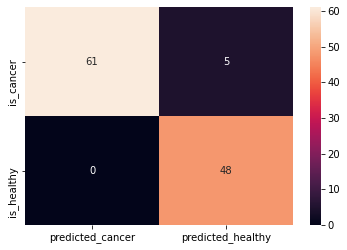

In [290]:
sns.heatmap(confusion,annot=True,fmt="d")

In [291]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95        48
           1       1.00      0.92      0.96        66

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114



**As we can see, the SVM model with Normalized data has only 5 false predictions (is_cancer).**

**This is a great performance, however, we can improve the model further to achieve at least 1 false prediction.**

## END OF Support Vector Machine (SVM)

# References:

1. https://scikit-learn.org/stable/supervised_learning.html
2. https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html
3. Andrew NG, Machine Learning | Coursera.
4. Géron, A. (2019). Hands-on machine learning with Scikit-Learn, Keras and TensorFlow: concepts, tools, and techniques to build intelligent systems (2nd ed.). O'Reilly.